In [1]:
import pandas as pd
mh_precip = pd.read_csv("../data/raw/MH_precipitation.csv")

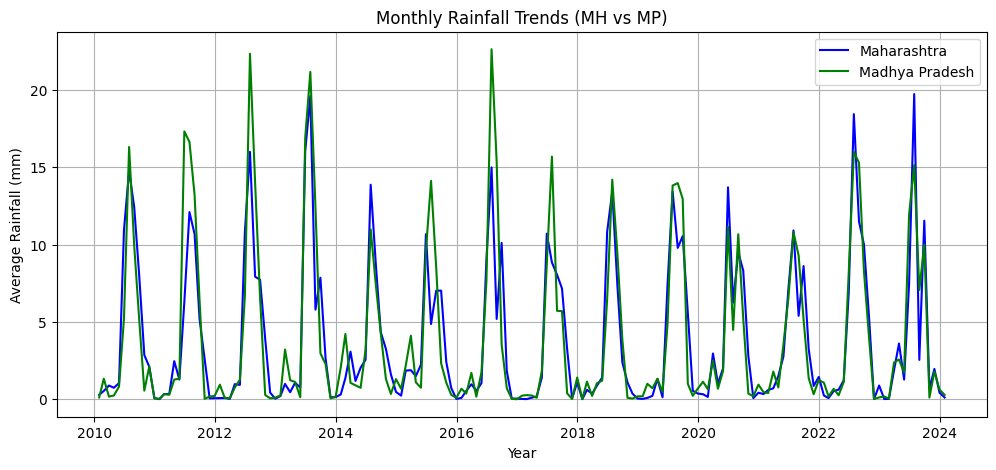

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (use your own paths)
mh_precip = pd.read_csv("../data/raw/MH_precipitation.csv")
mh_temp = pd.read_csv("../data/raw/MH_temperature.csv")
mp_precip = pd.read_csv("../data/raw/MP_precipitation.csv")
mp_temp = pd.read_csv("../data/raw/MP_temperature.csv")

# Convert date columns to datetime
mh_precip['date'] = pd.to_datetime(mh_precip['date'])
mh_temp['date'] = pd.to_datetime(mh_temp['date'])
mp_precip['date'] = pd.to_datetime(mp_precip['date'])
mp_temp['date'] = pd.to_datetime(mp_temp['date'])

# --- Climate Data Aggregation ---
# Monthly rainfall (mean of daily rainfall across districts)
mh_monthly_rainfall = mh_precip.groupby(pd.Grouper(key='date', freq='ME'))['rainfall_mm'].mean()
mp_monthly_rainfall = mp_precip.groupby(pd.Grouper(key='date', freq='ME'))['rainfall_mm'].mean()

# Monthly mean temperature
mh_monthly_temp = mh_temp.groupby(pd.Grouper(key='date', freq='ME'))['mean'].mean()
mp_monthly_temp = mp_temp.groupby(pd.Grouper(key='date', freq='ME'))['mean'].mean()

# --- Rainfall Trend Visualization ---
plt.figure(figsize=(12, 5))
plt.plot(mh_monthly_rainfall.index, mh_monthly_rainfall, label="Maharashtra", color='blue')
plt.plot(mp_monthly_rainfall.index, mp_monthly_rainfall, label="Madhya Pradesh", color='green')
plt.title("Monthly Rainfall Trends (MH vs MP)")
plt.xlabel("Year")
plt.ylabel("Average Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()



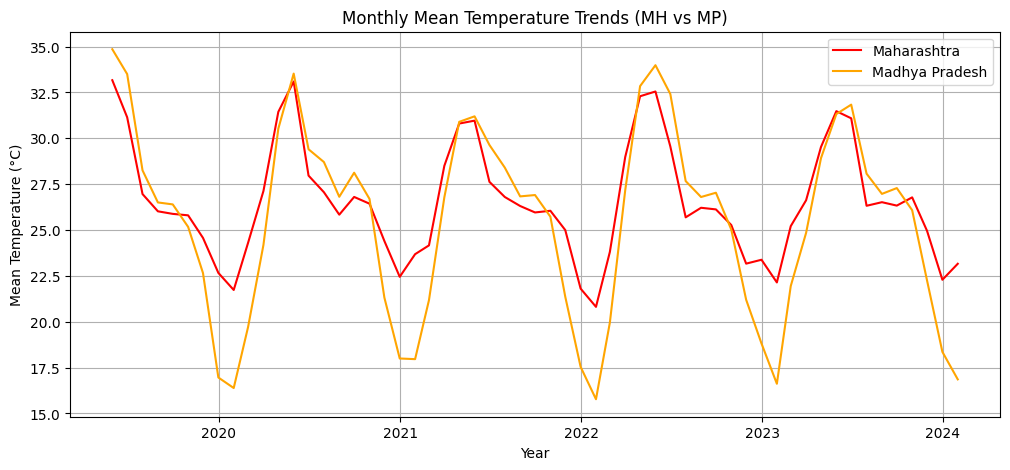

In [3]:
# --- Temperature Trend Visualization ---
plt.figure(figsize=(12, 5))
plt.plot(mh_monthly_temp.index, mh_monthly_temp, label="Maharashtra", color='red')
plt.plot(mp_monthly_temp.index, mp_monthly_temp, label="Madhya Pradesh", color='orange')
plt.title("Monthly Mean Temperature Trends (MH vs MP)")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()



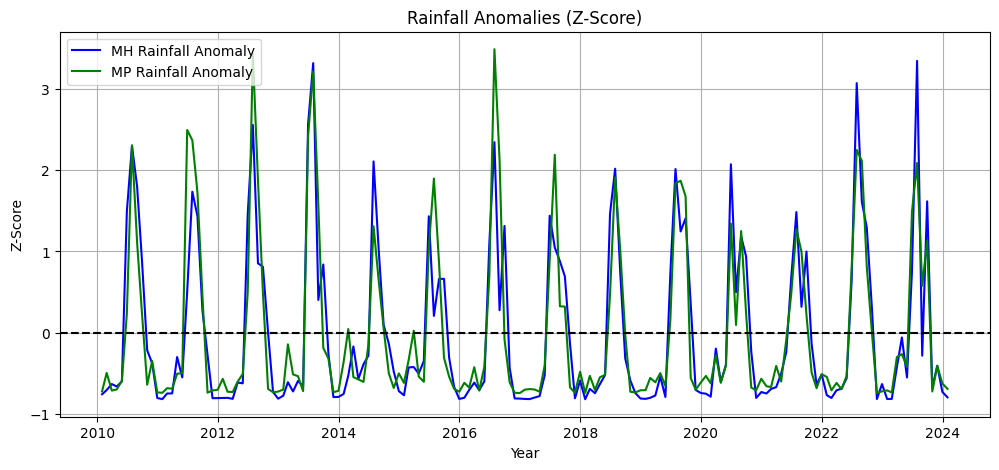

In [4]:
# --- Detecting Anomalies (optional) ---
# Compute z-scores for rainfall anomalies
mh_rain_anomaly = (mh_monthly_rainfall - mh_monthly_rainfall.mean()) / mh_monthly_rainfall.std()
mp_rain_anomaly = (mp_monthly_rainfall - mp_monthly_rainfall.mean()) / mp_monthly_rainfall.std()

plt.figure(figsize=(12, 5))
plt.plot(mh_rain_anomaly.index, mh_rain_anomaly, label="MH Rainfall Anomaly", color='blue')
plt.plot(mp_rain_anomaly.index, mp_rain_anomaly, label="MP Rainfall Anomaly", color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title("Rainfall Anomalies (Z-Score)")
plt.xlabel("Year")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_seasonal_climate(mh_precip, mh_temp, mp_precip, mp_temp):
    """
    Analyze seasonal climate trends (Kharif vs Rabi) and detect anomalies for MH and MP.
    """
    # --- Convert date columns ---
    mh_precip['date'] = pd.to_datetime(mh_precip['date'])
    mh_temp['date'] = pd.to_datetime(mh_temp['date'])
    mp_precip['date'] = pd.to_datetime(mp_precip['date'])
    mp_temp['date'] = pd.to_datetime(mp_temp['date'])

    # --- Add month column ---
    mh_precip['month'] = mh_precip['date'].dt.month
    mp_precip['month'] = mp_precip['date'].dt.month
    mh_temp['month'] = mh_temp['date'].dt.month
    mp_temp['month'] = mp_temp['date'].dt.month

    # --- Define Kharif (June-Oct) and Rabi (Nov-Mar) seasons ---
    kharif_months = [6, 7, 8, 9, 10]
    rabi_months = [11, 12, 1, 2, 3]

    def seasonal_aggregate(df, value_col):
        """Aggregate seasonal means per year."""
        df['year'] = df['date'].dt.year
        kharif = df[df['month'].isin(kharif_months)].groupby('year')[value_col].mean()
        rabi = df[df['month'].isin(rabi_months)].groupby('year')[value_col].mean()
        return kharif, rabi

    # --- Rainfall seasonal aggregation ---
    mh_k_rain, mh_r_rain = seasonal_aggregate(mh_precip, 'rainfall_mm')
    mp_k_rain, mp_r_rain = seasonal_aggregate(mp_precip, 'rainfall_mm')

    # --- Temperature seasonal aggregation ---
    mh_k_temp, mh_r_temp = seasonal_aggregate(mh_temp, 'mean')
    mp_k_temp, mp_r_temp = seasonal_aggregate(mp_temp, 'mean')

    # --- Plot seasonal rainfall ---
    plt.figure(figsize=(12, 6))
    plt.plot(mh_k_rain.index, mh_k_rain, label="MH Kharif Rainfall", color='blue')
    plt.plot(mh_r_rain.index, mh_r_rain, label="MH Rabi Rainfall", color='navy')
    plt.plot(mp_k_rain.index, mp_k_rain, label="MP Kharif Rainfall", color='green')
    plt.plot(mp_r_rain.index, mp_r_rain, label="MP Rabi Rainfall", color='darkgreen')
    plt.title("Seasonal Rainfall Trends (MH vs MP)")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot seasonal temperature ---
    plt.figure(figsize=(12, 6))
    plt.plot(mh_k_temp.index, mh_k_temp, label="MH Kharif Temp", color='red')
    plt.plot(mh_r_temp.index, mh_r_temp, label="MH Rabi Temp", color='darkred')
    plt.plot(mp_k_temp.index, mp_k_temp, label="MP Kharif Temp", color='orange')
    plt.plot(mp_r_temp.index, mp_r_temp, label="MP Rabi Temp", color='brown')
    plt.title("Seasonal Temperature Trends (MH vs MP)")
    plt.xlabel("Year")
    plt.ylabel("Mean Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Detect anomalies (Z-score > |2|) ---
    def detect_anomalies(series):
        z_scores = (series - series.mean()) / series.std()
        return series[z_scores.abs() > 2]

    anomalies = {
        "MH_Kharif_Rain_Anomalies": detect_anomalies(mh_k_rain),
        "MH_Rabi_Rain_Anomalies": detect_anomalies(mh_r_rain),
        "MP_Kharif_Rain_Anomalies": detect_anomalies(mp_k_rain),
        "MP_Rabi_Rain_Anomalies": detect_anomalies(mp_r_rain)
    }

    return anomalies


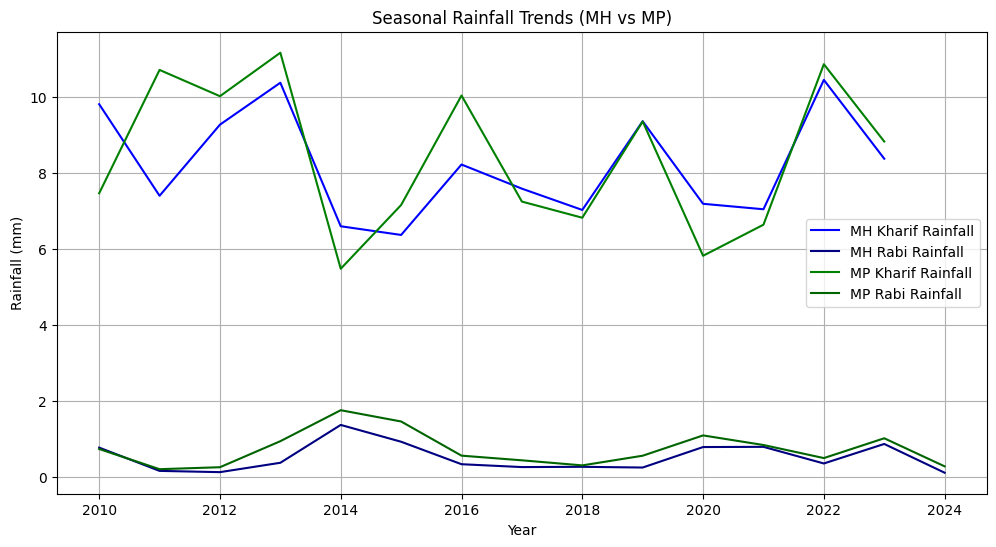

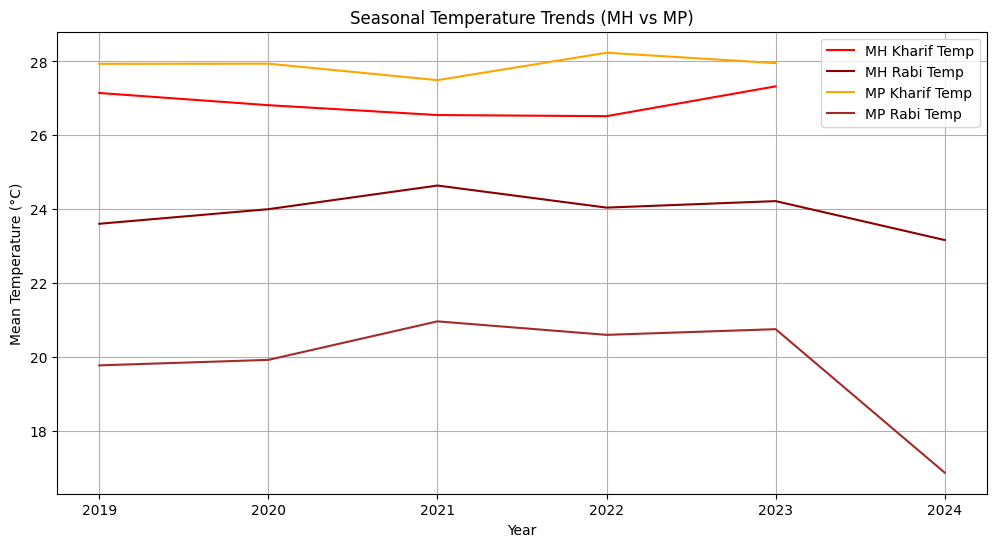

{'MH_Kharif_Rain_Anomalies': Series([], Name: rainfall_mm, dtype: float64), 'MH_Rabi_Rain_Anomalies': year
2014    1.369719
Name: rainfall_mm, dtype: float64, 'MP_Kharif_Rain_Anomalies': Series([], Name: rainfall_mm, dtype: float64), 'MP_Rabi_Rain_Anomalies': year
2014    1.756583
Name: rainfall_mm, dtype: float64}


In [6]:
anomalies = analyze_seasonal_climate(mh_precip, mh_temp, mp_precip, mp_temp)
print(anomalies)